# Project 2: Ames Housing Data 
### Notebook 02 - Class Kaggle competition modeling 


_Author: Joe Serigano (jserigano4@gmail.com)_

---

**Objectives:**
- Use cleaned data sets (from notebook 01) to create a linear regression model that predicts home prices in Ames, Iowa with the lowest possible RMSE.
- Create linear regression models using Ridge, Lasso, and ElasticNet

In [1]:
#Importing relevant modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

import warnings
warnings.simplefilter("ignore")

In [2]:
# Reading in our cleaned training data and our test data that will be used for the class kaggle competition
train = pd.read_csv('datasets/train_cleaned.csv')
test = pd.read_csv('datasets/test_cleaned.csv')

train = train.drop(columns = ['Unnamed: 0'])
test = test.drop(columns = ['Unnamed: 0'])

# Setting up our X and y from our full training data
X = train.drop(columns = ['SalePrice'])
y = train['SalePrice']

# Splitting our full training data into training and testing sets for model evaluation within this notebook.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [3]:
train.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,109,533352170,60,79.5,9.511703,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,9.349406,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,8.977399,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9.190342,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,9.563459,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


## Linear Regression model

In [4]:
# Instantiating and fitting our model
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.9462063735369112

In [5]:
print(f'Training R2: {lr.score(X_train, y_train)}')
print(f'Testing R2: {lr.score(X_test, y_test)}')

Training R2: 0.9462063735369112
Testing R2: 0.9013755649129332


The R^2 scores above are pretty good! 94.6% of the variance/variability in home sale price in our training data can be explained by the features in our model. 90.1% of variance/variability in our test data set (new data to the model) can be explained. Let's now make predictions and plot our residuals to check for LINE assumptions.

In [6]:
# Creating predictions and residuals for our testing data
preds = lr.predict(X_test)

resids = y_test - preds

print("RMSE is: ", metrics.mean_squared_error(y_test, preds, squared = False))

RMSE is:  0.122646834192469


Our RMSE is 0.12 which is pretty good! We want RMSE to be as close to 0 as possible. Our model is doing a good job at predicting home sale prices.

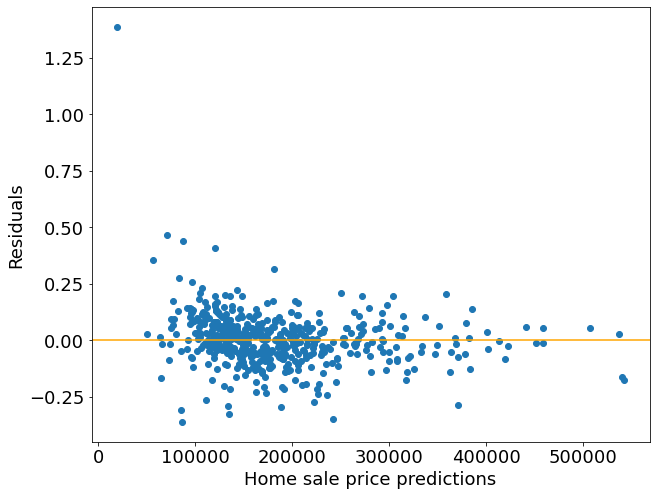

In [7]:
fsize = 18

plt.figure(figsize = (10,8))
plt.scatter(np.exp(preds), resids)
plt.axhline(0, color = 'orange');
plt.xlabel('Home sale price predictions', fontsize = fsize)
plt.ylabel('Residuals', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize);

Well, clearly there is one home that was not predicted well... Aside from this home, the residuals of the rest do appear to pass the E test of equal variances.

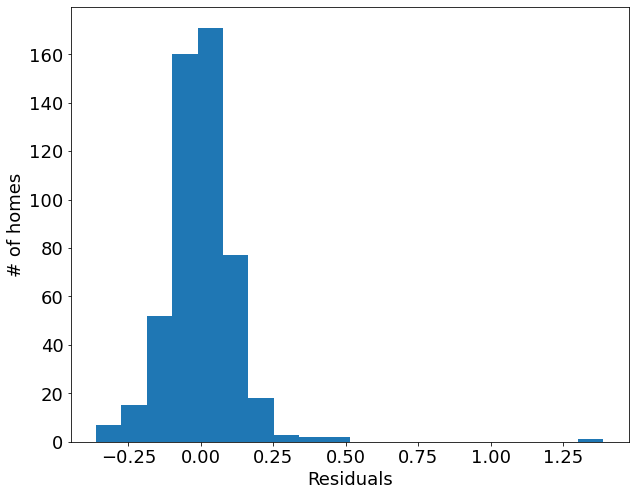

In [8]:
plt.figure(figsize = (10,8))
plt.hist(resids, bins = 20)
plt.xlabel('Residuals', fontsize = fsize)
plt.ylabel('# of homes', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize);

Again, aside from the one outlier it seems that our model also passes the N test - normality of residuals. 

Now, we will create our model predictions to submit for the Kaggle competition:

In [9]:
# Create predictions
preds = lr.predict(test)

# back-log transform sale prices
test['SalePrice'] = np.exp(preds)

# create DataFrame to submit
lr_submission = test[['Id', 'SalePrice']]
lr_submission.set_index('Id', inplace = True)

# Check
lr_submission.head()

,SalePrice
Id,
2658,88712.737605
2718,150901.316976
2414,220646.363616
1989,103028.177501
625,165415.457647


In [10]:
# Save
lr_submission.to_csv('kaggle_submission_serigano_1.csv')

## Ridge Model

Similar to the linear regression model above, we will create a ridge model and evaluate the model's performance.

In [11]:
# Setting up a list of ridge alphas to check.
alphas = np.logspace(0, 5, 100)

# Cross-validating over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = alphas, cv = 5) 

# Fitting model using best ridge alpha.
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [12]:
print(f'The optimal alpha value is {ridge_cv.alpha_}')
print(f'Training R2: {ridge_cv.score(X_train, y_train)}')
print(f'Testing R2: {ridge_cv.score(X_test, y_test)}')

The optimal alpha value is 5.722367659350217
Training R2: 0.9378182829842763
Testing R2: 0.9312196400757979


In [13]:
preds = ridge_cv.predict(X_test)
print("RMSE is: ", metrics.mean_squared_error(y_test, preds, squared = False))

RMSE is:  0.10242271887428185


Our Ridge model is outperforming our previous model, with 93.1% of the variance/variability in home sale price in our test being explained by the features in our model. This model also has a lower RMSE.

Now, we will create our model predictions to submit for the Kaggle competition:

In [14]:
test = pd.read_csv('datasets/test_cleaned.csv')
test = test.drop(columns = ['Unnamed: 0'])


preds = ridge_cv.predict(test)
test['SalePrice'] = np.exp(preds)

RCV_submission = test[['Id', 'SalePrice']]
RCV_submission.set_index('Id', inplace = True)

RCV_submission.to_csv('kaggle_submission_serigano_2.csv')

## Lasso Model

In [15]:
# Setting up a list of Lasso alphas to check.
l_alphas = np.logspace(-5, 0, 100)

# Cross-validating over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas)

# Fitting model using best Lasso alpha.
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-05, 1.12332403e-05, 1.26185688e-05, 1.41747416e-05,
       1.59228279e-05, 1.78864953e-05, 2.00923300e-05, 2.25701972e-05,
       2.53536449e-05, 2.84803587e-05, 3.19926714e-05, 3.59381366e-05,
       4.03701726e-05, 4.53487851e-05, 5.09413801e-05, 5.72236766e-05,
       6.42807312e-05, 7.22080902e-05, 8.11130831e-05, 9.11162756e-05,
       1.02353102e-04, 1.14975700e-0...
       6.89261210e-02, 7.74263683e-02, 8.69749003e-02, 9.77009957e-02,
       1.09749877e-01, 1.23284674e-01, 1.38488637e-01, 1.55567614e-01,
       1.74752840e-01, 1.96304065e-01, 2.20513074e-01, 2.47707636e-01,
       2.78255940e-01, 3.12571585e-01, 3.51119173e-01, 3.94420606e-01,
       4.43062146e-01, 4.97702356e-01, 5.59081018e-01, 6.28029144e-01,
       7.05480231e-01, 7.92482898e-01, 8.90215085e-01, 1.00000000e+00]))

In [16]:
print(f'The optimal alpha value is {lasso_cv.alpha_}')
print(f'Training R2: {lasso_cv.score(X_train, y_train)}')
print(f'Testing R2: {lasso_cv.score(X_test, y_test)}')

The optimal alpha value is 0.0001830738280295368
Training R2: 0.9398675885266339
Testing R2: 0.9213960955238201


In [17]:
preds = lasso_cv.predict(X_test)
print("RMSE is: ", metrics.mean_squared_error(y_test, preds, squared = False))

RMSE is:  0.10949294519688126


Our Lasso model is outperforming our first model but not performing as well as our Ridge model. 92.1% of the variance/variability in home sale price in our test being explained by the features in our model. This model also has a higher RMSE than the previous model.

Now, we will again create our model predictions to submit for the Kaggle competition:

In [18]:
test = pd.read_csv('datasets/test_cleaned.csv')
test = test.drop(columns = ['Unnamed: 0'])


preds = lasso_cv.predict(test)
test['SalePrice'] = np.exp(preds)

LCV_submission = test[['Id', 'SalePrice']]
LCV_submission.set_index('Id', inplace = True)

LCV_submission.to_csv('kaggle_submission_serigano_3.csv')

## ElasticNet Model

The ElasticNet model combines the Ridge and Lasso penalties, adding *both* penalties to the loss function. So, we should hopefully be able to outperform all previous models here.

In [19]:
# Settin up a list of alphas to check.
enet_alphas = np.logspace(-5, 0, 100)

# Setting up our l1 ratio.
enet_ratio = 0.5

# Instantiating the model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fitting model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Evaluate model.
print(enet_model.score(X_train, y_train))

0.9390440380271764


In [20]:
print(f'The optimal alpha value is {enet_model.alpha_}')
print(f'Training R2: {enet_model.score(X_train, y_train)}')
print(f'Testing R2: {enet_model.score(X_test, y_test)}')

The optimal alpha value is 0.0003678379771828634
Training R2: 0.9390440380271764
Testing R2: 0.9280280560011396


Our Lasso model is outperforming our first model but not performing as well as our Ridge model. 92.1% of the variance/variability in home sale price in our test being explained by the features in our model.

Now, we will again create our model predictions to submit for the Kaggle competition

In [21]:
preds = enet_model.predict(X_test)
print("RMSE is: ", metrics.mean_squared_error(y_test, preds, squared = False))

RMSE is:  0.1047721111212492


Now, we will again create our model predictions to submit for the Kaggle competition:

In [22]:
test = pd.read_csv('datasets/test_cleaned.csv')
test = test.drop(columns = ['Unnamed: 0'])


preds = enet_model.predict(test)
test['SalePrice'] = np.exp(preds)

ENet_submission = test[['Id', 'SalePrice']]
ENet_submission.set_index('Id', inplace = True)

ENet_submission.to_csv('kaggle_submission_serigano_4_dropped.csv')

In the end, our Ridge model performs the best out of all models! It has the highest R^2 score for our test data as well as the lowest RMSE of all models.